# Credit Card Fraud Detection under Extreme Class Imbalance

This notebook explores a real-world credit card fraud detection problem
where fraudulent transactions represent only ~0.17% of all transactions.

**Objective**
- Detect fraudulent transactions reliably
- Handle extreme class imbalance
- Compare baseline and advanced models
- Analyze errors from a business perspective



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

from imblearn.over_sampling import SMOTE


In [18]:
df = pd.read_csv("../data/raw/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df.shape


(284807, 31)

In [20]:
df.isnull().sum().sum()


np.int64(0)

In [21]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [22]:
class_counts = df['Class'].value_counts()
class_percent = df['Class'].value_counts(normalize=True) * 100

class_counts, class_percent


(Class
 0    284315
 1       492
 Name: count, dtype: int64,
 Class
 0    99.827251
 1     0.172749
 Name: proportion, dtype: float64)

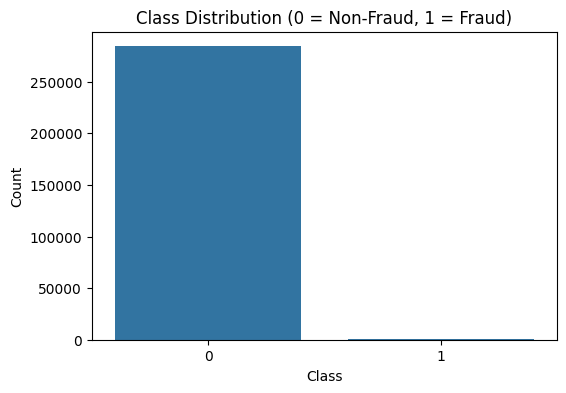

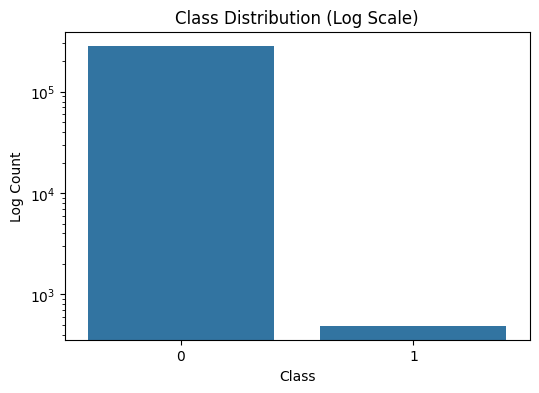

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.yscale("log")
plt.title("Class Distribution (Log Scale)")
plt.xlabel("Class")
plt.ylabel("Log Count")
plt.show()



### Observation

The dataset is extremely imbalanced. Fraudulent transactions represent
only ~0.17% of all samples. On a normal scale, the fraud class is barely
visible, which demonstrates why accuracy is a misleading metric and why
special techniques are required to handle class imbalance.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)


In [ ]:

y_train.value_counts(normalize=True) * 100


In [ ]:

lr = LogisticRegression(
    class_weight="balanced",
    max_iter=3000,
    random_state=42
)

lr.fit(X_train, y_train)


In [ ]:
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


### Logistic Regression – Results Analysis

The class-weighted logistic regression achieves a high ROC-AUC score,
indicating strong separability between fraud and non-fraud transactions.

However, while recall for the fraud class is high (87%), precision is
very low (6%). This means the model generates many false positives.
This behavior is expected in highly imbalanced datasets when recall is
prioritized to minimize missed fraud cases.

This highlights the trade-off between false positives and false negatives
in fraud detection systems.


In [ ]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

y_train_sm.value_counts()


In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_sm, y_train_sm)


In [ ]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


In [ ]:
import sklearn
print(sklearn.__version__)
